# Data Loading

Data merupakan dataset [brain stroke prediction](https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset) dari kaggle

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 400 ~/.kaggle/kaggle.json
!kaggle datasets download -d zzettrkalpakbal/full-filled-brain-stroke-dataset

  0% 0.00/52.1k [00:00<?, ?B/s]
100% 52.1k/52.1k [00:00<00:00, 30.5MB/s]


In [2]:
!unzip full-filled-brain-stroke-dataset.zip

Archive:  full-filled-brain-stroke-dataset.zip
  inflating: full_data.csv           
  inflating: full_filled_stroke_data (1).csv  


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('full_data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Analysis

## Checking null data and basic statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


## Grouping ages

In [8]:
df.loc[df['age'] <= 22, 'age'] = 1
df.loc[(df['age'] > 22) & (df['age'] <= 30), 'age'] = 2
df.loc[(df['age'] > 30) & (df['age'] <= 60), 'age'] = 3
df.loc[df['age'] >= 61, 'age'] = 4
df['age'] = df['age'].astype('int')

In [9]:
categorical_columns = ['age', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
numerical_columns = ['avg_glucose_level', 'bmi']

## Data distribution

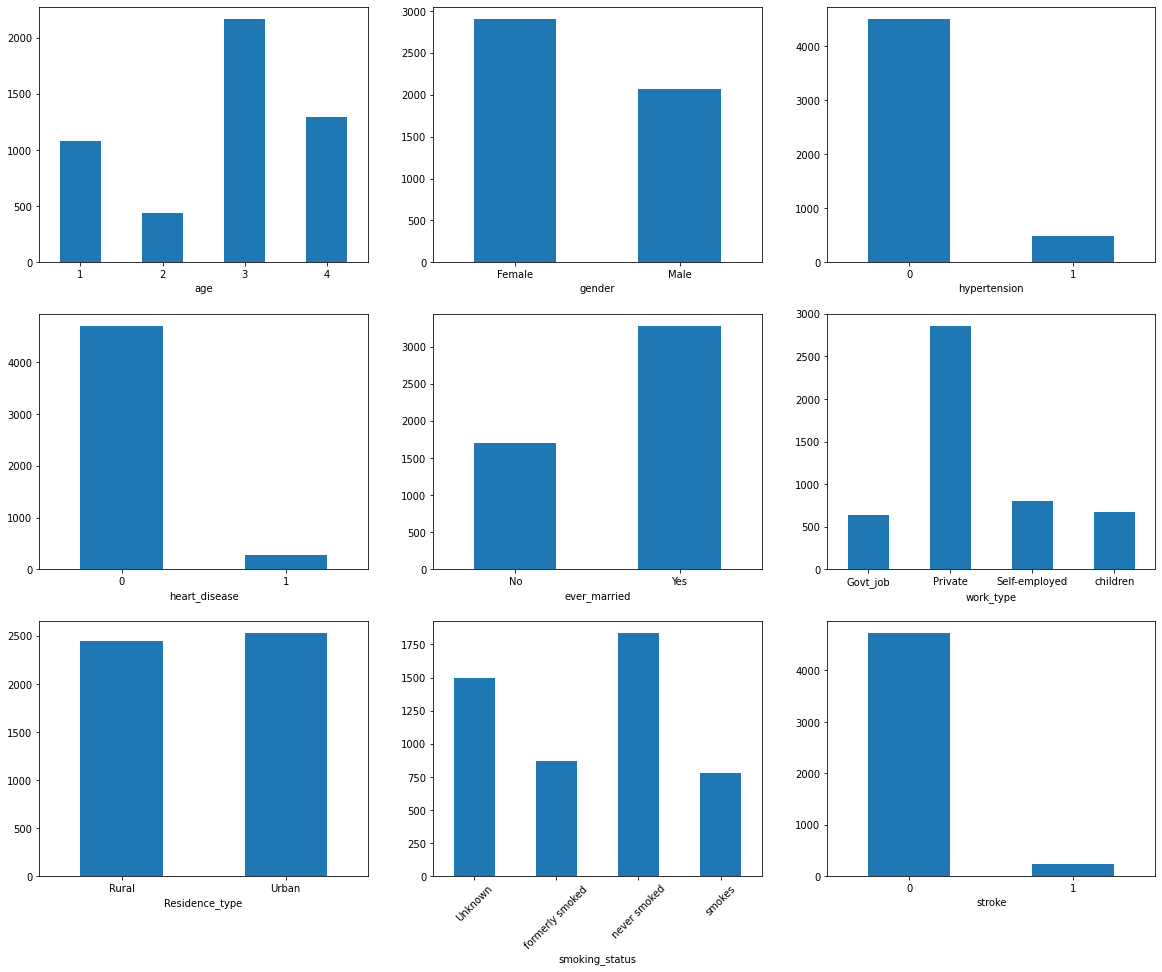

In [10]:
plt.subplots(3, 3, figsize=(20, 16))

for i, col in enumerate(categorical_columns):
  plt.subplot(3, 3, i + 1)
  if col == 'smoking_status':
    df.groupby(col).size().plot(kind='bar', rot=45)
  else:
    df.groupby(col).size().plot(kind='bar', rot=0)

# Data preparation

## Handling categorical data

In [11]:
df['gender'] = [0 if i == 'Male' else 1 for i in df['gender']]
df['ever_married'] = [0 if i == 'No' else 1 for i in df['ever_married']]
df = pd.get_dummies(df, columns=['age', 'work_type', 'Residence_type', 'smoking_status'])
df.head()

,gender,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,age_1,age_2,age_3,...,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,0,1,1,228.69,36.6,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0,0,1,1,105.92,32.5,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,171.23,34.4,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,1,1,0,1,174.12,24.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,0,0,0,1,186.21,29.0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0


## Splitting dataset

In [12]:
df.shape

(4981, 21)

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['stroke'])
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalizing numerical columns

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numerical_columns])

X_train[numerical_columns] = scaler.transform(X_train.loc[:, numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test.loc[:, numerical_columns])

# Modelling

In [68]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [102]:
models = {
    'AdaBoost': AdaBoostClassifier(random_state=42), 
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42), 
    'Decision Tree': DecisionTreeClassifier(random_state=42), 
    'SVM': SVC(random_state=42),
}

In [103]:
for i in models.keys():
  models[i].fit(X_train, y_train)

# Evaluation

In [104]:
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

In [105]:
test_df = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

AdaBoost
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



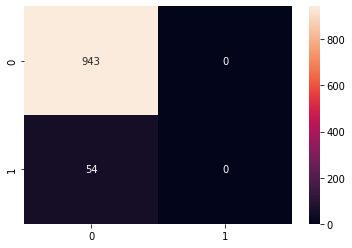

Gradient Boosting
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.50      0.06      0.10        54

    accuracy                           0.95       997
   macro avg       0.72      0.53      0.54       997
weighted avg       0.92      0.95      0.92       997



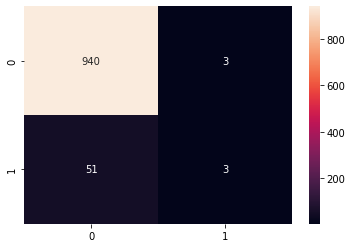

Random Forest
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.94      0.92       997



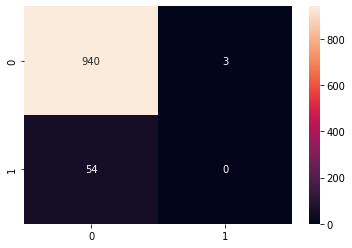

Decision Tree
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       943
           1       0.15      0.15      0.15        54

    accuracy                           0.91       997
   macro avg       0.55      0.55      0.55       997
weighted avg       0.91      0.91      0.91       997



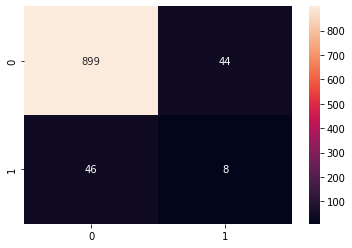

SVM
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



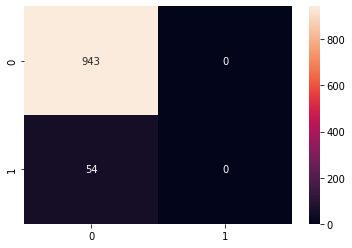

In [106]:
for i in models.keys():
  pred = models[i].predict(X_test)

  recall = recall_score(y_test, pred, zero_division=0)
  precision = precision_score(y_test, pred, zero_division=0)
  accuracy = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred, zero_division=0)
  test_df.loc[i] = [accuracy, precision, recall, f1]

  print(i)
  print(classification_report(y_test, pred, zero_division=0))
  cm = confusion_matrix(y_test, pred)
  sns.heatmap(cm, annot=cm, fmt='d')
  plt.show()
  print('=' * 100)

In [107]:
test_df

,Accuracy,Precision,Recall,F1-Score
AdaBoost,0.945838,0.0,0.0,0.0
Gradient Boosting,0.945838,0.5,0.055556,0.1
Random Forest,0.942828,0.0,0.0,0.0
Decision Tree,0.909729,0.153846,0.148148,0.150943
SVM,0.945838,0.0,0.0,0.0


# Modelling and Evaluation - 2

In [108]:
stroke_len = df['stroke'].value_counts()[1]
df2 = df[df['stroke'] == 0].sample(stroke_len, random_state=42).copy()
df2 = pd.concat([df2, df[df['stroke'] == 1]])
df2.shape

(496, 21)

In [109]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns=['stroke'])
y = df2['stroke']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
X_train2[numerical_columns] = scaler.transform(X_train2.loc[:, numerical_columns])
X_test2[numerical_columns] = scaler.transform(X_test2.loc[:, numerical_columns])

In [111]:
models = {
    'AdaBoost': AdaBoostClassifier(random_state=42), 
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42), 
    'Decision Tree': DecisionTreeClassifier(random_state=42), 
    'SVM': SVC(random_state=42),
}

In [112]:
for i in models.keys():
  models[i].fit(X_train2, y_train2)

In [113]:
test_df = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

## Test on current testing dataset

AdaBoost
              precision    recall  f1-score   support

           0       0.65      0.64      0.65        50
           1       0.65      0.66      0.65        50

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.65      0.65      0.65       100



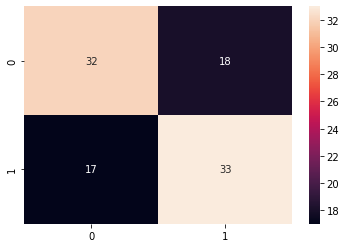

Gradient Boosting
              precision    recall  f1-score   support

           0       0.62      0.58      0.60        50
           1       0.60      0.64      0.62        50

    accuracy                           0.61       100
   macro avg       0.61      0.61      0.61       100
weighted avg       0.61      0.61      0.61       100



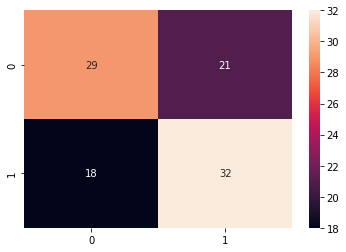

Random Forest
              precision    recall  f1-score   support

           0       0.60      0.58      0.59        50
           1       0.60      0.62      0.61        50

    accuracy                           0.60       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.60      0.60      0.60       100



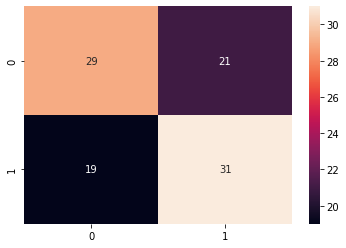

Decision Tree
              precision    recall  f1-score   support

           0       0.57      0.42      0.48        50
           1       0.54      0.68      0.60        50

    accuracy                           0.55       100
   macro avg       0.55      0.55      0.54       100
weighted avg       0.55      0.55      0.54       100



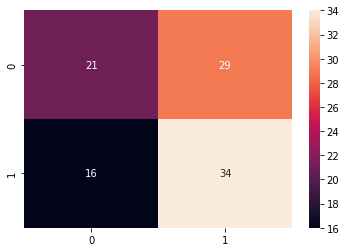

SVM
              precision    recall  f1-score   support

           0       0.65      0.72      0.69        50
           1       0.69      0.62      0.65        50

    accuracy                           0.67       100
   macro avg       0.67      0.67      0.67       100
weighted avg       0.67      0.67      0.67       100



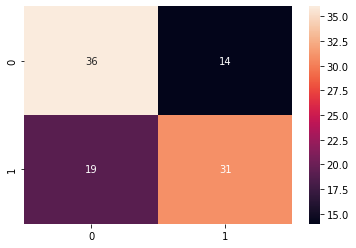

In [118]:
for i in models.keys():
  pred = models[i].predict(X_test2)

  recall = recall_score(y_test2, pred, zero_division=0)
  precision = precision_score(y_test2, pred, zero_division=0)
  accuracy = accuracy_score(y_test2, pred)
  f1 = f1_score(y_test2, pred, zero_division=0)
  test_df.loc[i] = [accuracy, precision, recall, f1]

  print(i)
  print(classification_report(y_test2, pred, zero_division=0))
  cm = confusion_matrix(y_test2, pred)
  sns.heatmap(cm, annot=cm, fmt='d')
  plt.show()
  print('=' * 100)

In [119]:
test_df

,Accuracy,Precision,Recall,F1-Score
AdaBoost,0.65,0.647059,0.66,0.653465
Gradient Boosting,0.61,0.603774,0.64,0.621359
Random Forest,0.6,0.596154,0.62,0.607843
Decision Tree,0.55,0.539683,0.68,0.60177
SVM,0.67,0.688889,0.62,0.652632


## Test on previous testing dataset

AdaBoost
              precision    recall  f1-score   support

           0       0.98      0.68      0.80       943
           1       0.12      0.76      0.20        54

    accuracy                           0.68       997
   macro avg       0.55      0.72      0.50       997
weighted avg       0.93      0.68      0.77       997



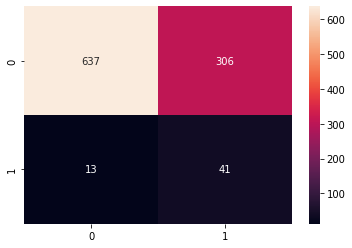

Gradient Boosting
              precision    recall  f1-score   support

           0       0.98      0.68      0.80       943
           1       0.12      0.78      0.21        54

    accuracy                           0.68       997
   macro avg       0.55      0.73      0.50       997
weighted avg       0.93      0.68      0.77       997



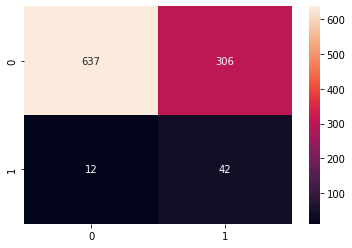

Random Forest
              precision    recall  f1-score   support

           0       0.98      0.68      0.81       943
           1       0.13      0.80      0.22        54

    accuracy                           0.69       997
   macro avg       0.55      0.74      0.51       997
weighted avg       0.94      0.69      0.77       997



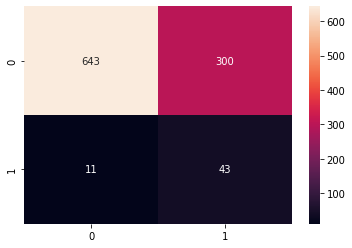

Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.62      0.76       943
           1       0.10      0.70      0.17        54

    accuracy                           0.62       997
   macro avg       0.53      0.66      0.46       997
weighted avg       0.93      0.62      0.73       997



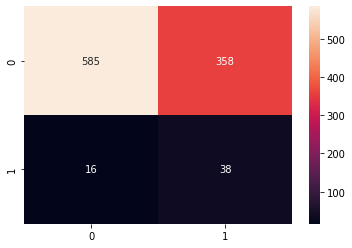

SVM
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       943
           1       0.15      0.78      0.25        54

    accuracy                           0.75       997
   macro avg       0.57      0.76      0.55       997
weighted avg       0.94      0.75      0.82       997



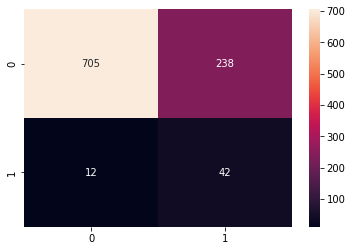

In [116]:
for i in models.keys():
  pred = models[i].predict(X_test)

  recall = recall_score(y_test, pred, zero_division=0)
  precision = precision_score(y_test, pred, zero_division=0)
  accuracy = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred, zero_division=0)
  test_df.loc[i] = [accuracy, precision, recall, f1]

  print(i)
  print(classification_report(y_test, pred, zero_division=0))
  cm = confusion_matrix(y_test, pred)
  sns.heatmap(cm, annot=cm, fmt='d')
  plt.show()
  print('=' * 100)

In [117]:
test_df

,Accuracy,Precision,Recall,F1-Score
AdaBoost,0.68004,0.118156,0.759259,0.204489
Gradient Boosting,0.681043,0.12069,0.777778,0.208955
Random Forest,0.688064,0.125364,0.796296,0.216625
Decision Tree,0.624875,0.09596,0.703704,0.168889
SVM,0.749248,0.15,0.777778,0.251497
